# Applying the PD Model

### Calculating PD of individual accounts

In [257]:
import pandas as pd
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)
import numpy as np
import pickle
# Class to display p-values for logistic regression in sklearn.

from sklearn import linear_model
import scipy.stats as stat

class LogisticRegression_with_p_values:
    
    def __init__(self,*args,**kwargs):#,**kwargs):
        self.model = linear_model.LogisticRegression(*args,**kwargs)#,**args)

    def fit(self,X,y):
        self.model.fit(X,y)
        
        #### Get p-values for the fitted model ####
        denom = (2.0 * (1.0 + np.cosh(self.model.decision_function(X))))
        denom = np.tile(denom,(X.shape[1],1)).T
        F_ij = np.dot((X / denom).T,X) ## Fisher Information Matrix
        Cramer_Rao = np.linalg.inv(F_ij) ## Inverse Information Matrix
        sigma_estimates = np.sqrt(np.diagonal(Cramer_Rao))
        z_scores = self.model.coef_[0] / sigma_estimates # z-score for eaach model coefficient
        p_values = [stat.norm.sf(abs(x)) * 2 for x in z_scores] ### two tailed test for p-values
        
        self.coef_ = self.model.coef_
        self.intercept_ = self.model.intercept_
        self.p_values = p_values


loan_data_inputs_test = pd.read_csv(r'D:\Datasets\LendingClub\loan_data_inputs_test.csv', index_col=0)
loan_data_targets_test = pd.read_csv(r'D:\Datasets\LendingClub\loan_data_targets_test.csv', index_col=0).values.reshape(-1,)

In [258]:
loaded_model = pickle.load(open('pd_model.sav', 'rb'))

In [259]:
inputs_test_with_ref_cat = loan_data_inputs_test.loc[: , ['grade:A',
'grade:B',
'grade:C',
'grade:D',
'grade:E',
'grade:F',
'grade:G',
'home_ownership:RENT_OTHER_NONE_ANY',
'home_ownership:OWN',
'home_ownership:MORTGAGE',
'addr_state:ME_DC_WY_WV_VT_MS',
'addr_state:NY',
'addr_state:RI_NM_NC_OK_SD_VA_LA',
'addr_state:MD_NJ_MO',
'addr_state:CA',
'addr_state:ID_TN',
'addr_state:AZ_MI_UT_AR_PA_OH_MN_IN',
'addr_state:KY_MA_GA_WA_WI_DE',
'addr_state:OR_IL',
'addr_state:TX',
'addr_state:CT_SC_AK',
'addr_state:KS_CO_MT_NH',
'verification_status:Verified',
'verification_status:Source Verified',
'verification_status:Not Verified',
'purpose:edu_sb_re_m_h_other',
'purpose:med_wed_vac',
'purpose:debt_consolidation',
'purpose:hi_mp_car',
'purpose:credit_card',
'initial_list_status:f',
'initial_list_status:w',
'term:36',
'term:60',
'emp_length:0',
'emp_length:1',
'emp_length:2-4',
'emp_length:5-6',
'emp_length:7-9',
'emp_length:10',
'mths_since_issue_d:<38',
'mths_since_issue_d:38-39',
'mths_since_issue_d:<40-41',
'mths_since_issue_d:<42-48',
'mths_since_issue_d:<49-52',
'mths_since_issue_d:<53-64',
'mths_since_issue_d:<65-84',
'mths_since_issue_d:>84',
'int_rate:<9.548',
'int_rate:9.548-12.025',
'int_rate:12.025-15.74',
'int_rate:15.74-20.281',
'int_rate:>20.281',
'mths_since_earliest_cr_line:<142',
'mths_since_earliest_cr_line:142-266',
'mths_since_earliest_cr_line:266-355',
'mths_since_earliest_cr_line:>355',
#'delinq_2yrs:0',
#'delinq_2yrs:1-3',
#'delinq_2yrs:>=4',
'inq_last_6mths:0',
'inq_last_6mths:1-2',
'inq_last_6mths:3-6',
'inq_last_6mths:>6',
#'open_acc:0',
#'open_acc:1-3',
#'open_acc:4-12',
#'open_acc:13-17',
#'open_acc:18-22',
#'open_acc:23-25',
#'open_acc:26-30',
#'open_acc:>=31',
#'pub_rec:0-2',
#'pub_rec:3-4',
#'pub_rec:>=5',
#'total_acc:<=25',
#'total_acc:25-51',
#'total_acc:>=51',
'acc_now_delinq:0',
'acc_now_delinq:>=1',
#'total_rev_hi_lim:<=5K',
#'total_rev_hi_lim:5K-10K',
#'total_rev_hi_lim:10K-20K',
#'total_rev_hi_lim:20K-30K',
#'total_rev_hi_lim:30K-40K',
#'total_rev_hi_lim:40K-55K',
#'total_rev_hi_lim:55K-95K',
#'total_rev_hi_lim:>95K',
'annual_inc:<20K',
'annual_inc:20K-30K',
'annual_inc:30K-40K',
'annual_inc:40K-50K',
'annual_inc:50K-60K',
'annual_inc:60K-70K',
'annual_inc:70K-80K',
'annual_inc:80K-90K',
'annual_inc:90K-100K',
'annual_inc:100K-120K',
'annual_inc:120K-140K',
'annual_inc:>140K',
'mths_since_last_delinq:Missing',
'mths_since_last_delinq:0-3',
'mths_since_last_delinq:4-30',
'mths_since_last_delinq:31-56',
'mths_since_last_delinq:>=57',
'dti:<=1.4',
'dti:1.4-3.5',
'dti:3.5-7.7',
'dti:7.7-10.5',
'dti:10.5-16.1',
'dti:16.1-20.3',
'dti:20.3-21.7',
'dti:21.7-22.4',
'dti:22.4-35',
'dti:>35',
'mths_since_last_record:Missing',
'mths_since_last_record:0-2',
'mths_since_last_record:3-20',
'mths_since_last_record:21-31',
'mths_since_last_record:32-80',
'mths_since_last_record:81-86',
'mths_since_last_record:>=86',
]]

In [260]:
# removing one dummy variable for k-1
ref_categories = ['grade:G',
                'home_ownership:RENT_OTHER_NONE_ANY',
                'addr_state:ND_NE_IA_NV_HI_FL_AL',
                'verification_status:Verified',
                'purpose:edu_sb_re_m_h_other',
                 'initial_list_status:f',
                 'term:60',
                 'emp_length:0',
                 'mths_since_issue_d:>84',
                 'int_rate:>20.281',
                 'mths_since_earliest_cr_line:<142',
                 'delinq_2yrs:>=4',
                 'inq_last_6mths:>6',
                 'open_acc:0',
                 'pub_rec:>=5',
                 'total_acc:<=25',
                 'acc_now_delinq:>=1',
                 'total_rev_hi_lim<=5K',
                 'annual_inc:<20K',
                 'mths_since_last_delinq:Missing',
                 'dti>35',
                 'mths_since_last_record:Missing']

In [261]:
# selecting the desires columns
sel_cols = [c for c in inputs_test_with_ref_cat.columns if c not in ref_categories]

In [262]:
inputs_test = inputs_test_with_ref_cat[sel_cols]
# loan_data_targets_test

In [263]:
feature_name = inputs_test.columns.values

In [264]:
summary_table = pd.DataFrame(columns = ['Feature name'], data = feature_name)
summary_table['Coefficients'] = np.transpose(loaded_model.coef_)
# add the intercept
summary_table.index = summary_table.index + 1
summary_table.loc[0] = ['Intercept', loaded_model.intercept_[0]]
summary_table = summary_table.sort_index()
p_values = loaded_model.p_values
# added nan for intercept
p_values = np.append(np.nan, np.array(p_values))
summary_table['p_values'] = p_values
summary_table

,Feature name,Coefficients,p_values
0,Intercept,-0.568964,NaN
1,grade:A,1.111614,3.753207e-33
2,grade:B,0.887381,1.946959e-47
3,grade:C,0.688519,9.294358e-34
4,grade:D,0.512656,2.323139e-21
5,grade:E,0.361757,5.995327e-14
6,grade:F,0.214676,1.995375e-05
7,home_ownership:OWN,0.075539,1.798870e-04
8,home_ownership:MORTGAGE,0.109237,1.027099e-17
9,addr_state:ME_DC_WY_WV_VT_MS,0.489534,1.407016e-19


In [265]:
# PD of new accounts
# creating a scorecard
# calculating a credit score
# from credit score to pd

"""
A scorecard is used in retail credit and unsecured lending as a tool for evaluating the creditworthiness of potential borrowers.
It is a statistical model that uses information from a borrower's credit report and other sources to predict the likelihood of default on a loan. 
The scorecard assigns a credit score to the borrower, which is then used by the lender to make a decision about whether to approve the loan and at what terms.
The scorecard considers factors such as the borrower's credit history, income, and debt-to-income ratio to generate a score.
The higher the score, the lower the risk of default, and the more favorable the loan terms will be for the borrower.
"""


"\nA scorecard is used in retail credit and unsecured lending as a tool for evaluating the creditworthiness of potential borrowers.\nIt is a statistical model that uses information from a borrower's credit report and other sources to predict the likelihood of default on a loan. \nThe scorecard assigns a credit score to the borrower, which is then used by the lender to make a decision about whether to approve the loan and at what terms.\nThe scorecard considers factors such as the borrower's credit history, income, and debt-to-income ratio to generate a score.\nThe higher the score, the lower the risk of default, and the more favorable the loan terms will be for the borrower.\n"

### Creating a Scorecard

In [266]:
df_ref_categories = pd.DataFrame(ref_categories, columns=['Feature name'])
df_ref_categories['Coefficients'] = 0
df_ref_categories['p_values'] = np.nan
df_ref_categories

,Feature name,Coefficients,p_values
0,grade:G,0,NaN
1,home_ownership:RENT_OTHER_NONE_ANY,0,NaN
2,addr_state:ND_NE_IA_NV_HI_FL_AL,0,NaN
3,verification_status:Verified,0,NaN
4,purpose:edu_sb_re_m_h_other,0,NaN
5,initial_list_status:f,0,NaN
6,term:60,0,NaN
7,emp_length:0,0,NaN
8,mths_since_issue_d:>84,0,NaN
9,int_rate:>20.281,0,NaN


In [267]:
df_scorecard = pd.concat([summary_table, df_ref_categories])
df_scorecard = df_scorecard.reset_index()
df_scorecard

,index,Feature name,Coefficients,p_values
0,0,Intercept,-0.568964,NaN
1,1,grade:A,1.111614,3.753207e-33
2,2,grade:B,0.887381,1.946959e-47
3,3,grade:C,0.688519,9.294358e-34
4,4,grade:D,0.512656,2.323139e-21
5,5,grade:E,0.361757,5.995327e-14
6,6,grade:F,0.214676,1.995375e-05
7,7,home_ownership:OWN,0.075539,1.798870e-04
8,8,home_ownership:MORTGAGE,0.109237,1.027099e-17
9,9,addr_state:ME_DC_WY_WV_VT_MS,0.489534,1.407016e-19


In [268]:
df_scorecard['Original feature name'] = df_scorecard['Feature name'].str.split(':').str[0]

In [269]:
df_scorecard

,index,Feature name,Coefficients,p_values,Original feature name
0,0,Intercept,-0.568964,NaN,Intercept
1,1,grade:A,1.111614,3.753207e-33,grade
2,2,grade:B,0.887381,1.946959e-47,grade
3,3,grade:C,0.688519,9.294358e-34,grade
4,4,grade:D,0.512656,2.323139e-21,grade
5,5,grade:E,0.361757,5.995327e-14,grade
6,6,grade:F,0.214676,1.995375e-05,grade
7,7,home_ownership:OWN,0.075539,1.798870e-04,home_ownership
8,8,home_ownership:MORTGAGE,0.109237,1.027099e-17,home_ownership
9,9,addr_state:ME_DC_WY_WV_VT_MS,0.489534,1.407016e-19,addr_state


In [270]:
min_score = 300
max_score = 850

In [271]:
df_scorecard.groupby('Original feature name')['Coefficients'].min()

Original feature name
Intercept                     -0.568964
acc_now_delinq                -0.119468
addr_state                     0.000000
annual_inc                    -0.091924
delinq_2yrs                    0.000000
dti                           -0.308162
dti>35                         0.000000
emp_length                     0.000000
grade                          0.000000
home_ownership                 0.000000
initial_list_status            0.000000
inq_last_6mths                 0.000000
int_rate                       0.000000
mths_since_earliest_cr_line    0.000000
mths_since_issue_d            -0.073917
mths_since_last_delinq        -0.090863
mths_since_last_record        -0.401474
open_acc                       0.000000
pub_rec                        0.000000
purpose                        0.000000
term                           0.000000
total_acc                      0.000000
total_rev_hi_lim<=5K           0.000000
verification_status           -0.023368
Name: Coefficients

In [272]:
min_sum_coef = df_scorecard.groupby('Original feature name')['Coefficients'].min().sum()
min_sum_coef

-1.6781395696490449

In [273]:
max_sum_coef = df_scorecard.groupby('Original feature name')['Coefficients'].max().sum()
max_sum_coef

5.554234844587085

In [274]:
df_scorecard['Score - Calculation'] = df_scorecard['Coefficients'] * (max_score - min_score) / (max_sum_coef - min_sum_coef)
df_scorecard

,index,Feature name,Coefficients,p_values,Original feature name,Score - Calculation
0,0,Intercept,-0.568964,NaN,Intercept,-43.267963
1,1,grade:A,1.111614,3.753207e-33,grade,84.534882
2,2,grade:B,0.887381,1.946959e-47,grade,67.482615
3,3,grade:C,0.688519,9.294358e-34,grade,52.359761
4,4,grade:D,0.512656,2.323139e-21,grade,38.985957
5,5,grade:E,0.361757,5.995327e-14,grade,27.510541
6,6,grade:F,0.214676,1.995375e-05,grade,16.325464
7,7,home_ownership:OWN,0.075539,1.798870e-04,home_ownership,5.744506
8,8,home_ownership:MORTGAGE,0.109237,1.027099e-17,home_ownership,8.307160
9,9,addr_state:ME_DC_WY_WV_VT_MS,0.489534,1.407016e-19,addr_state,37.227582


In [275]:
# changing the intercept score
df_scorecard['Score - Calculation'][0] = ((df_scorecard['Coefficients'][0] - min_sum_coef) / (max_sum_coef - min_sum_coef)) * (max_score - min_score) + min_score
df_scorecard

C:\Users\User\AppData\Local\Temp\ipykernel_3488\3623543951.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_scorecard['Score - Calculation'][0] = ((df_scorecard['Coefficients'][0] - min_sum_coef) / (max_sum_coef - min_sum_coef)) * (max_score - min_score) + min_score


,index,Feature name,Coefficients,p_values,Original feature name,Score - Calculation
0,0,Intercept,-0.568964,NaN,Intercept,384.349430
1,1,grade:A,1.111614,3.753207e-33,grade,84.534882
2,2,grade:B,0.887381,1.946959e-47,grade,67.482615
3,3,grade:C,0.688519,9.294358e-34,grade,52.359761
4,4,grade:D,0.512656,2.323139e-21,grade,38.985957
5,5,grade:E,0.361757,5.995327e-14,grade,27.510541
6,6,grade:F,0.214676,1.995375e-05,grade,16.325464
7,7,home_ownership:OWN,0.075539,1.798870e-04,home_ownership,5.744506
8,8,home_ownership:MORTGAGE,0.109237,1.027099e-17,home_ownership,8.307160
9,9,addr_state:ME_DC_WY_WV_VT_MS,0.489534,1.407016e-19,addr_state,37.227582


In [276]:
df_scorecard['Score - Preliminary'] = df_scorecard['Score - Calculation'].round()
df_scorecard

,index,Feature name,Coefficients,p_values,Original feature name,Score - Calculation,Score - Preliminary
0,0,Intercept,-0.568964,NaN,Intercept,384.349430,384.0
1,1,grade:A,1.111614,3.753207e-33,grade,84.534882,85.0
2,2,grade:B,0.887381,1.946959e-47,grade,67.482615,67.0
3,3,grade:C,0.688519,9.294358e-34,grade,52.359761,52.0
4,4,grade:D,0.512656,2.323139e-21,grade,38.985957,39.0
5,5,grade:E,0.361757,5.995327e-14,grade,27.510541,28.0
6,6,grade:F,0.214676,1.995375e-05,grade,16.325464,16.0
7,7,home_ownership:OWN,0.075539,1.798870e-04,home_ownership,5.744506,6.0
8,8,home_ownership:MORTGAGE,0.109237,1.027099e-17,home_ownership,8.307160,8.0
9,9,addr_state:ME_DC_WY_WV_VT_MS,0.489534,1.407016e-19,addr_state,37.227582,37.0


In [277]:
min_sum_score_prel = df_scorecard.groupby('Original feature name')['Score - Preliminary'].min().sum()
min_sum_score_prel

299.0

In [278]:
max_sum_score_prel = df_scorecard.groupby('Original feature name')['Score - Preliminary'].max().sum()
max_sum_score_prel

851.0

In [279]:
df_scorecard['Difference'] = df_scorecard['Score - Preliminary'] - df_scorecard['Score - Calculation']
df_scorecard

,index,Feature name,Coefficients,p_values,Original feature name,Score - Calculation,Score - Preliminary,Difference
0,0,Intercept,-0.568964,NaN,Intercept,384.349430,384.0,-0.349430
1,1,grade:A,1.111614,3.753207e-33,grade,84.534882,85.0,0.465118
2,2,grade:B,0.887381,1.946959e-47,grade,67.482615,67.0,-0.482615
3,3,grade:C,0.688519,9.294358e-34,grade,52.359761,52.0,-0.359761
4,4,grade:D,0.512656,2.323139e-21,grade,38.985957,39.0,0.014043
5,5,grade:E,0.361757,5.995327e-14,grade,27.510541,28.0,0.489459
6,6,grade:F,0.214676,1.995375e-05,grade,16.325464,16.0,-0.325464
7,7,home_ownership:OWN,0.075539,1.798870e-04,home_ownership,5.744506,6.0,0.255494
8,8,home_ownership:MORTGAGE,0.109237,1.027099e-17,home_ownership,8.307160,8.0,-0.307160
9,9,addr_state:ME_DC_WY_WV_VT_MS,0.489534,1.407016e-19,addr_state,37.227582,37.0,-0.227582


In [280]:
df_scorecard['Score - Final'] = df_scorecard['Score - Preliminary']
df_scorecard['Score - Final'][1] = 84.

C:\Users\User\AppData\Local\Temp\ipykernel_3488\2382321821.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_scorecard['Score - Final'][1] = 84.


In [281]:
min_sum_score_prel = df_scorecard.groupby('Original feature name')['Score - Final'].min().sum()
min_sum_score_prel

299.0

In [282]:
max_sum_score_prel = df_scorecard.groupby('Original feature name')['Score - Final'].max().sum()
max_sum_score_prel

850.0

### Calculate a Credit Score

In [283]:
inputs_test_with_ref_cat.head()

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,grade:G,home_ownership:RENT_OTHER_NONE_ANY,home_ownership:OWN,home_ownership:MORTGAGE,addr_state:ME_DC_WY_WV_VT_MS,addr_state:NY,addr_state:RI_NM_NC_OK_SD_VA_LA,addr_state:MD_NJ_MO,addr_state:CA,addr_state:ID_TN,addr_state:AZ_MI_UT_AR_PA_OH_MN_IN,addr_state:KY_MA_GA_WA_WI_DE,addr_state:OR_IL,addr_state:TX,addr_state:CT_SC_AK,addr_state:KS_CO_MT_NH,verification_status:Verified,verification_status:Source Verified,verification_status:Not Verified,purpose:edu_sb_re_m_h_other,purpose:med_wed_vac,purpose:debt_consolidation,purpose:hi_mp_car,purpose:credit_card,initial_list_status:f,initial_list_status:w,term:36,term:60,emp_length:0,emp_length:1,emp_length:2-4,emp_length:5-6,emp_length:7-9,emp_length:10,mths_since_issue_d:<38,mths_since_issue_d:38-39,mths_since_issue_d:<40-41,mths_since_issue_d:<42-48,mths_since_issue_d:<49-52,mths_since_issue_d:<53-64,mths_since_issue_d:<65-84,mths_since_issue_d:>84,int_rate:<9.548,int_rate:9.548-12.025,int_rate:12.025-15.74,int_rate:15.74-20.281,int_rate:>20.281,mths_since_earliest_cr_line:<142,mths_since_earliest_cr_line:142-266,mths_since_earliest_cr_line:266-355,mths_since_earliest_cr_line:>355,inq_last_6mths:0,inq_last_6mths:1-2,inq_last_6mths:3-6,inq_last_6mths:>6,acc_now_delinq:0,acc_now_delinq:>=1,annual_inc:<20K,annual_inc:20K-30K,annual_inc:30K-40K,annual_inc:40K-50K,annual_inc:50K-60K,annual_inc:60K-70K,annual_inc:70K-80K,annual_inc:80K-90K,annual_inc:90K-100K,annual_inc:100K-120K,annual_inc:120K-140K,annual_inc:>140K,mths_since_last_delinq:Missing,mths_since_last_delinq:0-3,mths_since_last_delinq:4-30,mths_since_last_delinq:31-56,mths_since_last_delinq:>=57,dti:<=1.4,dti:1.4-3.5,dti:3.5-7.7,dti:7.7-10.5,dti:10.5-16.1,dti:16.1-20.3,dti:20.3-21.7,dti:21.7-22.4,dti:22.4-35,dti:>35,mths_since_last_record:Missing,mths_since_last_record:0-2,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86,mths_since_last_record:>=86
421662,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
345847,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
87245,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0
422411,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
131614,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0


In [284]:
inputs_test_with_ref_cat['addr_state:ND_NE_IA_NV_HI_FL_AL'] = 0
inputs_test_with_ref_cat['dti>35'] = 0
for c in ['delinq_2yrs:>=4', 'open_acc:0', 'pub_rec:>=5', 'total_acc:<=25', 'total_rev_hi_lim<=5K']:
    inputs_test_with_ref_cat[c] = 0

In [285]:
df_scorecard

,index,Feature name,Coefficients,p_values,Original feature name,Score - Calculation,Score - Preliminary,Difference,Score - Final
0,0,Intercept,-0.568964,NaN,Intercept,384.349430,384.0,-0.349430,384.0
1,1,grade:A,1.111614,3.753207e-33,grade,84.534882,85.0,0.465118,84.0
2,2,grade:B,0.887381,1.946959e-47,grade,67.482615,67.0,-0.482615,67.0
3,3,grade:C,0.688519,9.294358e-34,grade,52.359761,52.0,-0.359761,52.0
4,4,grade:D,0.512656,2.323139e-21,grade,38.985957,39.0,0.014043,39.0
5,5,grade:E,0.361757,5.995327e-14,grade,27.510541,28.0,0.489459,28.0
6,6,grade:F,0.214676,1.995375e-05,grade,16.325464,16.0,-0.325464,16.0
7,7,home_ownership:OWN,0.075539,1.798870e-04,home_ownership,5.744506,6.0,0.255494,6.0
8,8,home_ownership:MORTGAGE,0.109237,1.027099e-17,home_ownership,8.307160,8.0,-0.307160,8.0
9,9,addr_state:ME_DC_WY_WV_VT_MS,0.489534,1.407016e-19,addr_state,37.227582,37.0,-0.227582,37.0


In [286]:
inputs_test_with_ref_cat_w_intercept = inputs_test_with_ref_cat

In [287]:
inputs_test_with_ref_cat_w_intercept.insert(0, 'Intercept', 1)

In [288]:
inputs_test_with_ref_cat_w_intercept.head()

,Intercept,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,grade:G,home_ownership:RENT_OTHER_NONE_ANY,home_ownership:OWN,home_ownership:MORTGAGE,addr_state:ME_DC_WY_WV_VT_MS,addr_state:NY,addr_state:RI_NM_NC_OK_SD_VA_LA,addr_state:MD_NJ_MO,addr_state:CA,addr_state:ID_TN,addr_state:AZ_MI_UT_AR_PA_OH_MN_IN,addr_state:KY_MA_GA_WA_WI_DE,addr_state:OR_IL,addr_state:TX,addr_state:CT_SC_AK,addr_state:KS_CO_MT_NH,verification_status:Verified,verification_status:Source Verified,verification_status:Not Verified,purpose:edu_sb_re_m_h_other,purpose:med_wed_vac,purpose:debt_consolidation,purpose:hi_mp_car,purpose:credit_card,initial_list_status:f,initial_list_status:w,term:36,term:60,emp_length:0,emp_length:1,emp_length:2-4,emp_length:5-6,emp_length:7-9,emp_length:10,mths_since_issue_d:<38,mths_since_issue_d:38-39,mths_since_issue_d:<40-41,mths_since_issue_d:<42-48,mths_since_issue_d:<49-52,mths_since_issue_d:<53-64,mths_since_issue_d:<65-84,mths_since_issue_d:>84,int_rate:<9.548,int_rate:9.548-12.025,int_rate:12.025-15.74,int_rate:15.74-20.281,int_rate:>20.281,mths_since_earliest_cr_line:<142,mths_since_earliest_cr_line:142-266,mths_since_earliest_cr_line:266-355,mths_since_earliest_cr_line:>355,inq_last_6mths:0,inq_last_6mths:1-2,inq_last_6mths:3-6,inq_last_6mths:>6,acc_now_delinq:0,acc_now_delinq:>=1,annual_inc:<20K,annual_inc:20K-30K,annual_inc:30K-40K,annual_inc:40K-50K,annual_inc:50K-60K,annual_inc:60K-70K,annual_inc:70K-80K,annual_inc:80K-90K,annual_inc:90K-100K,annual_inc:100K-120K,annual_inc:120K-140K,annual_inc:>140K,mths_since_last_delinq:Missing,mths_since_last_delinq:0-3,mths_since_last_delinq:4-30,mths_since_last_delinq:31-56,mths_since_last_delinq:>=57,dti:<=1.4,dti:1.4-3.5,dti:3.5-7.7,dti:7.7-10.5,dti:10.5-16.1,dti:16.1-20.3,dti:20.3-21.7,dti:21.7-22.4,dti:22.4-35,dti:>35,mths_since_last_record:Missing,mths_since_last_record:0-2,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86,mths_since_last_record:>=86,addr_state:ND_NE_IA_NV_HI_FL_AL,dti>35,delinq_2yrs:>=4,open_acc:0,pub_rec:>=5,total_acc:<=25,total_rev_hi_lim<=5K
421662,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
345847,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
87245,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
422411,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
131614,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [289]:
# set column order
inputs_test_with_ref_cat_w_intercept = inputs_test_with_ref_cat_w_intercept[df_scorecard['Feature name'].values]

In [291]:
inputs_test_with_ref_cat_w_intercept.head()

,Intercept,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,home_ownership:OWN,home_ownership:MORTGAGE,addr_state:ME_DC_WY_WV_VT_MS,addr_state:NY,addr_state:RI_NM_NC_OK_SD_VA_LA,addr_state:MD_NJ_MO,addr_state:CA,addr_state:ID_TN,addr_state:AZ_MI_UT_AR_PA_OH_MN_IN,addr_state:KY_MA_GA_WA_WI_DE,addr_state:OR_IL,addr_state:TX,addr_state:CT_SC_AK,addr_state:KS_CO_MT_NH,verification_status:Source Verified,verification_status:Not Verified,purpose:med_wed_vac,purpose:debt_consolidation,purpose:hi_mp_car,purpose:credit_card,initial_list_status:w,term:36,emp_length:1,emp_length:2-4,emp_length:5-6,emp_length:7-9,emp_length:10,mths_since_issue_d:<38,mths_since_issue_d:38-39,mths_since_issue_d:<40-41,mths_since_issue_d:<42-48,mths_since_issue_d:<49-52,mths_since_issue_d:<53-64,mths_since_issue_d:<65-84,int_rate:<9.548,int_rate:9.548-12.025,int_rate:12.025-15.74,int_rate:15.74-20.281,mths_since_earliest_cr_line:142-266,mths_since_earliest_cr_line:266-355,mths_since_earliest_cr_line:>355,inq_last_6mths:0,inq_last_6mths:1-2,inq_last_6mths:3-6,acc_now_delinq:0,annual_inc:20K-30K,annual_inc:30K-40K,annual_inc:40K-50K,annual_inc:50K-60K,annual_inc:60K-70K,annual_inc:70K-80K,annual_inc:80K-90K,annual_inc:90K-100K,annual_inc:100K-120K,annual_inc:120K-140K,annual_inc:>140K,mths_since_last_delinq:0-3,mths_since_last_delinq:4-30,mths_since_last_delinq:31-56,mths_since_last_delinq:>=57,dti:<=1.4,dti:1.4-3.5,dti:3.5-7.7,dti:7.7-10.5,dti:10.5-16.1,dti:16.1-20.3,dti:20.3-21.7,dti:21.7-22.4,dti:22.4-35,dti:>35,mths_since_last_record:0-2,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86,mths_since_last_record:>=86,grade:G,home_ownership:RENT_OTHER_NONE_ANY,addr_state:ND_NE_IA_NV_HI_FL_AL,verification_status:Verified,purpose:edu_sb_re_m_h_other,initial_list_status:f,term:60,emp_length:0,mths_since_issue_d:>84,int_rate:>20.281,mths_since_earliest_cr_line:<142,delinq_2yrs:>=4,inq_last_6mths:>6,open_acc:0,pub_rec:>=5,total_acc:<=25,acc_now_delinq:>=1,total_rev_hi_lim<=5K,annual_inc:<20K,mths_since_last_delinq:Missing,dti>35,mths_since_last_record:Missing
421662,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
345847,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
87245,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1
422411,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
131614,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1


In [292]:
scorecard_scores = df_scorecard['Score - Final']

In [293]:
inputs_test_with_ref_cat_w_intercept.shape

(93257, 105)

In [296]:
scorecard_scores = scorecard_scores.values.reshape(-1, 1)

In [298]:
scorecard_scores.shape

(105, 1)

In [300]:
# multiplying all rows of two matrices and then summing the products is known as dot product
y_scores = inputs_test_with_ref_cat_w_intercept.dot(scorecard_scores)

In [301]:
y_scores.head()

,0
421662,638.0
345847,580.0
87245,499.0
422411,638.0
131614,483.0


### From Credit Score to PD

In [302]:
sum_coef_from_score = ((y_scores - min_score) / (max_score - min_score)) * (max_sum_coef - min_sum_coef) + min_sum_coef

In [304]:
# ot obtain pd from score raise exponent to the power of total score and divide that by the same thing plus one
y_hat_proba_from_score = np.exp(sum_coef_from_score) / (np.exp(sum_coef_from_score) + 1)
y_hat_proba_from_score.head()

,0
421662,0.940838
345847,0.881195
87245,0.718830
422411,0.940838
131614,0.674425


In [309]:
y_hat_test_proba = loaded_model.model.predict_proba(inputs_test)
y_hat_test_proba[0: 5][:, 1]

array([0.94149348, 0.88150877, 0.71522273, 0.941492  , 0.67498296])

### Setting cut-offs

In [314]:
# receiver operating characteristic curve
# shows the accuracy at different cutoff thresholds
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

y_hat_test = loaded_model.model.predict(inputs_test)
y_hat_test_proba = loaded_model.model.predict_proba(inputs_test)
# probability of being a good borrower
y_hat_test_proba = y_hat_test_proba[:][:, 1]

In [315]:
loan_data_targets_test_temp = loan_data_targets_test

df_actual_predicted_probs = pd.concat([pd.DataFrame(loan_data_targets_test_temp), pd.DataFrame(y_hat_test_proba)], axis=1)
df_actual_predicted_probs.columns = ['loan_data_targets_test', 'y_hat_test_proba']
df_actual_predicted_probs.head()

,loan_data_targets_test,y_hat_test_proba
0,1,0.941493
1,1,0.881509
2,1,0.715223
3,1,0.941492
4,1,0.674983


In [316]:
fpr, tpr, thresholds = roc_curve(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test_proba'])

Text(0.5, 1.0, 'ROC curve')

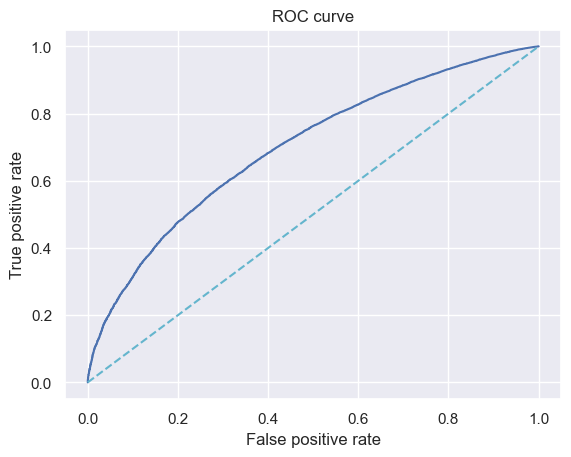

In [317]:
plt.plot(fpr, tpr) # ROC curve
plt.plot(fpr, fpr, linestyle= '--', color='c') # Benchmark 50/50
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')

In [318]:
df_cutoffs = pd.concat([pd.DataFrame(thresholds), pd.DataFrame(fpr), pd.DataFrame(tpr)], axis=1)
df_cutoffs.columns = ['thresholds', 'fpr', 'tpr']
df_cutoffs.head()

,thresholds,fpr,tpr
0,1.993114,0.000000,0.000000
1,0.993114,0.000000,0.000012
2,0.990999,0.000000,0.000253
3,0.990990,0.000099,0.000253
4,0.989188,0.000099,0.001515


In [319]:
# first threshold drop altogether or set to probability close to 1.
df_cutoffs['thresholds'][0] = 1 - 1/ np.power(10, 16)
df_cutoffs.head()

,thresholds,fpr,tpr
0,1.000000,0.000000,0.000000
1,0.993114,0.000000,0.000012
2,0.990999,0.000000,0.000253
3,0.990990,0.000099,0.000253
4,0.989188,0.000099,0.001515


In [321]:
# setting scores from probability
df_cutoffs['Score'] = ((np.log(df_cutoffs['thresholds'] / (1 - df_cutoffs['thresholds'])) - min_sum_coef) * ((max_score - min_score) / (max_sum_coef - min_sum_coef)) + min_score).round()

In [322]:
df_cutoffs.head()

,thresholds,fpr,tpr,Score
0,1.000000,0.000000,0.000000,2051.0
1,0.993114,0.000000,0.000012,806.0
2,0.990999,0.000000,0.000253,785.0
3,0.990990,0.000099,0.000253,785.0
4,0.989188,0.000099,0.001515,771.0


In [323]:
df_cutoffs['Score'][0] = max_score

In [324]:
df_cutoffs.head()

,thresholds,fpr,tpr,Score
0,1.000000,0.000000,0.000000,850.0
1,0.993114,0.000000,0.000012,806.0
2,0.990999,0.000000,0.000253,785.0
3,0.990990,0.000099,0.000253,785.0
4,0.989188,0.000099,0.001515,771.0


In [325]:
df_cutoffs.tail()

,thresholds,fpr,tpr,Score
17438,0.444217,0.999505,0.999940,411.0
17439,0.411196,0.999901,0.999940,400.0
17440,0.376919,0.999901,0.999952,389.0
17441,0.375738,1.000000,0.999952,389.0
17442,0.343767,1.000000,1.000000,378.0


In [326]:
## Approval and rejection rates for each cutoff
## Number of approved + number of rejected = Total
# Approval rate = Number approved / Total
# Rejection rate = Number rejected / Total
# Rejection rate = 1 - Approval rate

In [327]:
def n_approved(p):
    return np.where(df_actual_predicted_probs['y_hat_test_proba'] >= p, 1, 0).sum()

In [331]:
df_cutoffs['N Approved'] = df_cutoffs['thresholds'].apply(n_approved)
df_cutoffs['N Rejected'] = df_actual_predicted_probs['y_hat_test_proba'].shape[0] - df_cutoffs['N Approved']
df_cutoffs['Approval rate'] = df_cutoffs['N Approved'] / df_actual_predicted_probs['y_hat_test_proba'].shape[0]
df_cutoffs['Rejection rate'] = 1 - df_cutoffs['Approval rate']
df_cutoffs.head()

,thresholds,fpr,tpr,Score,N Approved,N Rejected,Approval rate,Rejection rate
0,1.000000,0.000000,0.000000,850.0,0,93257,0.000000,1.000000
1,0.993114,0.000000,0.000012,806.0,1,93256,0.000011,0.999989
2,0.990999,0.000000,0.000253,785.0,21,93236,0.000225,0.999775
3,0.990990,0.000099,0.000253,785.0,22,93235,0.000236,0.999764
4,0.989188,0.000099,0.001515,771.0,127,93130,0.001362,0.998638


In [332]:
df_cutoffs.iloc[5000:6200, :]

,thresholds,fpr,tpr,Score,N Approved,N Rejected,Approval rate,Rejection rate
5000,0.906971,0.256235,0.540017,601.0,47493,45764,0.509270,0.490730
5001,0.906971,0.256334,0.540017,601.0,47494,45763,0.509281,0.490719
5002,0.906921,0.256334,0.540281,601.0,47516,45741,0.509517,0.490483
5003,0.906920,0.256433,0.540281,601.0,47517,45740,0.509527,0.490473
5004,0.906899,0.256433,0.540413,601.0,47528,45729,0.509645,0.490355
5005,0.906895,0.256532,0.540413,601.0,47529,45728,0.509656,0.490344
5006,0.906845,0.256532,0.540690,601.0,47552,45705,0.509903,0.490097
5007,0.906844,0.256631,0.540690,601.0,47553,45704,0.509913,0.490087
5008,0.906840,0.256631,0.540738,601.0,47557,45700,0.509956,0.490044
5009,0.906837,0.256730,0.540738,601.0,47558,45699,0.509967,0.490033


In [333]:
# 10% default rate acceptable = 54.9% approval rate and 45.1% rejection rate

In [335]:
df_cutoffs.iloc[1000: 2000, :]

,thresholds,fpr,tpr,Score,N Approved,N Rejected,Approval rate,Rejection rate
1000,0.955064,0.048694,0.204731,660.0,17516,75741,0.187825,0.812175
1001,0.955062,0.048793,0.204731,660.0,17517,75740,0.187836,0.812164
1002,0.954998,0.048793,0.205164,660.0,17553,75704,0.188222,0.811778
1003,0.954995,0.048892,0.205164,660.0,17554,75703,0.188233,0.811767
1004,0.954923,0.048892,0.205489,660.0,17581,75676,0.188522,0.811478
1005,0.954922,0.048990,0.205489,660.0,17582,75675,0.188533,0.811467
1006,0.954902,0.048990,0.205621,660.0,17593,75664,0.188651,0.811349
1007,0.954901,0.049089,0.205621,660.0,17594,75663,0.188661,0.811339
1008,0.954896,0.049089,0.205645,660.0,17596,75661,0.188683,0.811317
1009,0.954895,0.049188,0.205645,660.0,17597,75660,0.188694,0.811306


In [ ]:
# 5% default rate acceptable = 22.1% approval rate and 77.9% rejection rate

In [336]:
df_scorecard.to_csv('df_scorecard.csv')